# Programming Assignment 4 - Linear versus Ridge Regression 

Your friend Bob just moved to Boston. He is a real estate agent who is trying to evaluate the prices of houses in the Boston area. He has been using a linear regression model but he wonders if he can improve his accuracy on predicting the prices for new houses. He comes to you for help as he knows that you're an expert in machine learning. 

As a pro, you suggest doing a *polynomial transformation*  to create a more flexible model, and performing ridge regression since having so many features compared to data points increases the variance. 

Bob, however, being a skeptic isn't convinced. He wants you to write a program that illustrates the difference in training and test costs for both linear and ridge regression on the same dataset. Being a good friend, you oblige and hence this assignment :) 

In this notebook, you are to explore the effects of ridge regression.  We will use a dataset that is part of the sklearn.dataset package.  Learn more at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

## Step 1:  Getting, understanding, and preprocessing the dataset

We first import the standard libaries and some libraries that will help us scale the data and perform some "feature engineering" by transforming the data into $\Phi_2({\bf x})$

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.model_selection import KFold
import pandas as pd
import matplotlib.pyplot as plt

###  Importing the dataset

In [2]:
# Import the boston dataset from sklearn
boston_data = load_boston()

In [3]:
#  Create X and Y variables - X holding the .data and Y holding .target 
X = boston_data.data
y = boston_data.target

#  Reshape Y to be a rank 2 matrix 
y = y.reshape(X.shape[0], 1)

# Proprocesing by adding a column of 1's to the front of X
# one_col = np.ones((X.shape[0],1))
# X = np.hstack((one_col, X))

# Observe the number of features and the number of labels
print('The number of features is: ', X.shape[1])
# Printing out the features
print('The features: ', boston_data.feature_names)
# The number of examples
print('The number of exampels in our dataset: ', X.shape[0])
#Observing the first 2 rows of the data
print(X[0:2])


The number of features is:  13
The features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
The number of exampels in our dataset:  506
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]


We will also create polynomial features for the dataset to test linear and ridge regression on data with degree = 1 and data with degree = 2. Feel free to increase the # of degress and see what effect it has on the training and test error. 

In [4]:
# Create a PolynomialFeatures object with degree = 2. 
# Transform X and save it into X_2. Simply copy Y into Y_2 
# Note: PolynomialFeatures creates a column of ones as the first feature
# poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_2 = poly.fit_transform(X)
y_2 = y

In [5]:
# the shape of X_2 and Y_2 - should be (506, 105) and (506, 1) respectively
print(X_2.shape)
print(y_2.shape)

(506, 104)
(506, 1)


# Your code goes here

In [6]:
# TODO - Define the get_coeff_ridge_normaleq function. Use the normal equation method.
# TODO - Return w values

def get_coeff_ridge_normaleq(X_train, y_train, alpha):
    # use np.linalg.pinv(a)
    #### TO-DO #####
    N = X_train.shape[0]
    identity = np.eye(X_train.shape[1])
    identity[0][0] = 0.0
    # w = np.linalg.pinv((X_train).T.dot(X_train) + N*alpha*identity).dot((X_train).T).dot(y_train)
    w = np.linalg.pinv((X_train).T.dot(X_train) + alpha*identity).dot((X_train).T).dot(y_train)
    ##############
    return w

In [7]:
# TODO - Define the evaluate_err_ridge function.
# TODO - Return the train_error and test_error values


def evaluate_err(X_train, X_test, y_train, y_test, w): 
    #### TO-DO #####
    N_train = X_train.shape[0]
    train_error = (1 / N_train) * (np.transpose(X_train.dot(w)-y_train)).dot(X_train.dot(w)-y_train)
    N_test = X_test.shape[0] 
    test_error = (1 / N_test) * (np.transpose(X_test.dot(w)-y_test)).dot(X_test.dot(w)-y_test)
    ##############
    return train_error[0][0], test_error[0][0]

In [8]:
# TODO - Finish writting the k_fold_cross_validation function. 
# TODO - Returns the average training error and average test error from the k-fold cross validation
# use Sklearns K-Folds cross-validator: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

def k_fold_cross_validation(k, X, y, alpha):
    kf = KFold(n_splits=k, random_state=21, shuffle=True)
    total_E_val_test = 0
    total_E_val_train = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # scaling the data matrix (except for for the first column of ones)
#         scaler = preprocessing.StandardScaler().fit(X_train[:,1:(X_train.shape[1]+1)])
#         X_train[:,1:(X_train.shape[1]+1)] = scaler.transform(X_train[:,1:(X_train.shape[1]+1)])
#         X_test[:,1:(X_train.shape[1]+1)] = scaler.transform(X_test[:,1:(X_train.shape[1]+1)])
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    
        # Proprocesing by adding a column of 1's to the front of X
        one_col_train = np.ones((X_train.shape[0],1))
        X_train = np.hstack((one_col_train, X_train))
        one_col_test = np.ones((X_test.shape[0],1))
        X_test = np.hstack((one_col_test, X_test))
        
        # determine the training error and the test error
        #### TO-DO #####
        w = get_coeff_ridge_normaleq(X_train, y_train, alpha)
        (train_error, test_error) = evaluate_err(X_train, X_test, y_train, y_test, w)
        total_E_val_train += train_error
        total_E_val_test += test_error
        
    E_val_train = total_E_val_train / k
    E_val_test = total_E_val_test / k
       ##############
    return  E_val_test, E_val_train
    


In [9]:
# specify the value of k (k-fold cross validation)
k = 10

### Question 1: Experiment with a linear regression. 

In [10]:
# Store the best results for question 1
degree = 1
result_1 = []  # [alpha, E_val_test, E_val_train, degree]

In [11]:
# 1-a  fit a linear model
alpha = 0.
E_val_test, E_val_train = k_fold_cross_validation(k, X, y, alpha)
print("MSE for test set: {}".format(E_val_test))
print("MSE for training set: {}".format(E_val_train))
result_1 += [[0., E_val_test, E_val_train, degree]]

MSE for test set: 23.636068605428214
MSE for training set: 21.806183575851065


In [12]:
# 1-b  ﬁt a ridge regression model 
Alpha = np.logspace(.01, 1, num=13)
res1 = []
for alpha in Alpha:
    E_val_test, E_val_train = k_fold_cross_validation(k, X, y, alpha)
    res1 += [[alpha, E_val_test, E_val_train]]
    result_1 += [[alpha, E_val_test, E_val_train, degree]]

res1_DF = pd.DataFrame(res1, columns=['alpha', 'MSE_test','MSE_train'])
res1_sorted = res1_DF.sort_values(by=['MSE_test'])
print("The best alpha is {}, with test error: {}".format(res1_sorted.iloc[0][0], res1_sorted.iloc[0][1]))
res1_DF

The best alpha is 1.4962356560944334, with test error: 23.633077307882157


,alpha,MSE_test,MSE_train
0,1.023293,23.633413,21.807512
1,1.237371,23.633196,21.808105
2,1.496236,23.633077,21.808958
3,1.809256,23.633137,21.810179
4,2.187762,23.633492,21.811920
5,2.645453,23.634312,21.814392
6,3.198895,23.635837,21.817882
7,3.868121,23.638400,21.822778
8,4.677351,23.642454,21.829599
9,5.655878,23.648603,21.839024


In [13]:
# 1-c  ﬁt a ridge regression model with different alpha
Alpha = np.logspace(-4, 0.01, num=25)
res1 = []
for alpha in Alpha:
    E_val_test, E_val_train = k_fold_cross_validation(k, X, y, alpha)
    res1 += [[alpha, E_val_test, E_val_train]]
    result_1 += [[alpha, E_val_test, E_val_train, degree]]
    
res1_DF = pd.DataFrame(res1, columns=['alpha', 'MSE_test','MSE_train'])
res1_sorted = res1_DF.sort_values(by=['MSE_test'])
print("The best alpha is {}, with test error: {}".format(res1_sorted.iloc[0][0], res1_sorted.iloc[0][1]))
res1_DF

The best alpha is 1.023292992280754, with test error: 23.633413370890672


,alpha,MSE_test,MSE_train
0,0.000100,23.636068,21.806184
1,0.000147,23.636068,21.806184
2,0.000216,23.636068,21.806184
3,0.000317,23.636067,21.806184
4,0.000466,23.636067,21.806184
5,0.000685,23.636066,21.806184
6,0.001006,23.636065,21.806184
7,0.001478,23.636063,21.806184
8,0.002171,23.636060,21.806184
9,0.003190,23.636056,21.806184


In [14]:
# Get the best alpha when degree = 1

result_1.sort(key=lambda x: x[1])
for i in range(5):
    print((result_1[i]))

[1.4962356560944334, 23.633077307882157, 21.808958002887373, 1]
[1.8092559102538208, 23.633136915516598, 21.810178867543744, 1]
[1.2373711899353526, 23.633195858169987, 21.80810541222859, 1]
[1.023292992280754, 23.633413370890672, 21.807512026567768, 1]
[1.023292992280754, 23.633413370890672, 21.807512026567768, 1]


### Question 2: Create a polynomial transformation of degree 2 on the features of the dataset. 

In [15]:
# Store the best results for question 2
degree = 2
result_2 = []  # [alpha, E_val_test, E_val_train, degree]

In [16]:
# 2-a  polynomial transformation with alpha=0
alpha = 0.
E_val_test, E_val_train = k_fold_cross_validation(k, X_2, y_2, alpha)

print("MSE for test set: {}".format(E_val_test))
print("MSE for training set: {}".format(E_val_train))
result_2 += [[0.0, E_val_test, E_val_train, degree]]

MSE for test set: 11.85496823342098
MSE for training set: 5.80882081601246


In [17]:
# 2-b ﬁt a ridge regression model 
Alpha = np.logspace(.01, 1, num=13)
res2 = []
for alpha in Alpha:
    E_val_test, E_val_train = k_fold_cross_validation(k, X_2, y_2, alpha)
    res2 += [[alpha, E_val_test, E_val_train]]
    result_2 += [[alpha, E_val_test, E_val_train, degree]]
    
res2_DF = pd.DataFrame(res2, columns=['alpha', 'MSE_test','MSE_train'])
res2_sorted = res2_DF.sort_values(by=['MSE_test'])
print("The best alpha is {}, with test error: {}".format(res2_sorted.iloc[0][0], res2_sorted.iloc[0][1]))
res2_DF

The best alpha is 1.023292992280754, with test error: 11.757217352780899


,alpha,MSE_test,MSE_train
0,1.023293,11.757217,7.429053
1,1.237371,11.837287,7.574286
2,1.496236,11.924501,7.728998
3,1.809256,12.019239,7.893864
4,2.187762,12.122080,8.069629
5,2.645453,12.233937,8.257179
6,3.198895,12.356226,8.457641
7,3.868121,12.491022,8.672500
8,4.677351,12.641170,8.903711
9,5.655878,12.810296,9.153772


In [18]:
# 2-c ﬁt a ridge regression model with different alpha
Alpha = np.logspace(-4, 0.01, num=25)
res2 = []
for alpha in Alpha:
    E_val_test, E_val_train = k_fold_cross_validation(k, X_2, y_2, alpha)
    res2 += [[alpha, E_val_test, E_val_train]]
    result_2 += [[alpha, E_val_test, E_val_train, degree]]
    
res2_DF = pd.DataFrame(res2, columns=['alpha', 'MSE_test','MSE_train'])
res2_sorted = res2_DF.sort_values(by=['MSE_test'])
print("The best alpha is {}, with test error: {}".format(res2_sorted.iloc[0][0], res2_sorted.iloc[0][1]))
res2_DF

The best alpha is 0.10174193661806046, with test error: 11.30448883656713


,alpha,MSE_test,MSE_train
0,0.000100,11.807933,5.810779
1,0.000147,11.798512,5.811494
2,0.000216,11.788001,5.812315
3,0.000317,11.776059,5.813278
4,0.000466,11.762324,5.814475
5,0.000685,11.746473,5.816060
6,0.001006,11.728165,5.818225
7,0.001478,11.706887,5.821194
8,0.002171,11.681866,5.825274
9,0.003190,11.652206,5.830975


In [19]:
# Get the best alpha when degree = 2

result_2.sort(key=lambda x: x[1])
for j in range(5):
    print(result_2[j])

[0.10174193661806046, 11.30448883656713, 6.243750395468105, 2]
[0.14948008403608803, 11.315152659190606, 6.3765838945702, 2]
[0.06924950392919477, 11.315781521519693, 6.134987053244873, 2]
[0.04713389536157405, 11.34458608343532, 6.048567941783648, 2]
[0.21961736002054366, 11.350807089017739, 6.5341941661972225, 2]


### Question 3: Answer the questions into a PDF ﬁle called proganswers.pdf

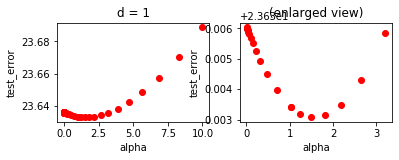

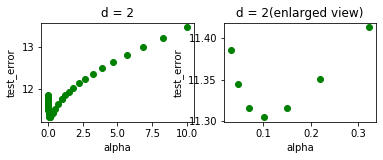

In [20]:
# 3-a the estimated MSE for the diﬀerent values of λ

plt.figure()

# when degree = 1
DF = pd.DataFrame(result_1, columns=['alpha', 'MSE_test','MSE_train','degree'])
alpha_x = DF['alpha']
mse_test = DF['MSE_test']

plt.subplot(2, 2, 1)
plt.plot(alpha_x, mse_test, 'ro')
plt.title('d = 1')
plt.xlabel('alpha')
plt.ylabel('test_error')

plt.subplot(2, 2, 2)
alpha_x = alpha_x[0:20]
mse_test = mse_test[0:20]
plt.plot(alpha_x, mse_test, 'ro')
plt.title('(enlarged view)')
plt.xlabel('alpha')
plt.ylabel('test_error')

# when degree = 2
DF = pd.DataFrame(result_2, columns=['alpha', 'MSE_test','MSE_train','degree'])
alpha_x = DF['alpha']
mse_test = DF['MSE_test']

plt.figure()
plt.subplot(2, 2, 3)
plt.plot(alpha_x, mse_test, 'go')
plt.title('d = 2')
plt.xlabel('alpha')
plt.ylabel('test_error')

plt.subplot(2, 2, 4)
alpha_x = alpha_x[0:7]
mse_test = mse_test[0:7]
plt.plot(alpha_x, mse_test, 'go')
plt.title('d = 2(enlarged view)')
plt.xlabel('alpha')
plt.ylabel('test_error')

plt.show()

In [21]:
# 3-b choose which model is better
model_best = min(result_1[0], result_2[0], key=lambda x: x[1])
alpha_best = model_best[0]
d_best = model_best[-1]
print("The best alpha is {}, with the best degree: {}".format(alpha_best, d_best))

The best alpha is 0.10174193661806046, with the best degree: 2


In [22]:
#  Reﬁt the parameters using all the data and predict the price 
X_single_test = np.array([[5, 0.5, 2, 0, 4, 8, 4, 6, 2, 2, 2, 4, 5.5]])
# X_single_test = X_single_test.reshape(1, X_single_test.shape[0])
X_all_data = X
y_all_data = y

if d_best == 2:
    X_all_data = X_2
    X_single_test = poly.fit_transform(X_single_test)

scaler = preprocessing.StandardScaler().fit(X_all_data)
X_all_data = scaler.transform(X_all_data)
X_single_test = scaler.transform(X_single_test)

# y_best_mean = np.mean(y_best)
# y_best -= y_best_mean

# Proprocesing by adding a column of 1's to the front of X
one_col_train = np.ones((X_all_data.shape[0],1))
X_train = np.hstack((one_col_train, X_all_data))
one_col_test = np.ones((X_single_test.shape[0],1))
X_test = np.hstack((one_col_test, X_single_test))
    
w_best = get_coeff_ridge_normaleq(X_train, y_all_data, alpha_best)
y_single_test = X_test.dot(w_best)[0][0]
print("The predicted price is: {}, when alpha = {}".format(y_single_test, alpha_best))

The predicted price is: 220.36920388021673, when alpha = 0.10174193661806046


In [23]:
alpha_best = 1.023292992280754
w_best = get_coeff_ridge_normaleq(X_train, y_all_data, alpha_best)
y_single_test = X_test.dot(w_best)[0][0]
print("The predicted price is: {}, when alpha = {}".format(y_single_test, alpha_best))

The predicted price is: 25.62735711812161, when alpha = 1.023292992280754
